In [1]:
import pandas as pd

In [2]:
#Load the dataset
twilight_newmoon_labeled = pd.read_excel('7_labeled.xlsx')

In [3]:
# Cleaning data

# Rename column for consistency
twilight_newmoon_labeled = twilight_newmoon_labeled.rename(columns={"sentiment ": "sentiment"})

#Drop Row with missing values in columns sentiment and comment_body
twilight_newmoon_labeled = twilight_newmoon_labeled.dropna(subset=['sentiment', 'comment_body'])

# Ensure manually labeled sentiment is in the correct format
twilight_newmoon_labeled['sentiment'] = twilight_newmoon_labeled['sentiment'].replace({'positive ': "positive", 'negative ': "negative", 'neutral ': "neutral"})

In [4]:
# Initialize VADER 
# Predict: label sentiments using compound score

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound = scores["compound"]
    return "positive" if compound >= 0.05 else "negative" if compound <= -0.05 else "neutral"

#Run VADER on the labeled dataset
twilight_newmoon_labeled["vader_sentiment"] = twilight_newmoon_labeled["comment_body"].astype(str).apply(get_vader_sentiment)
# Save the labeled dataset with VADER predictions
twilight_newmoon_labeled.to_excel('7_labeled_vader.xlsx', index=False)


VADER Accuracy: 0.5367

VADER Classification Report:
              precision    recall  f1-score   support

    negative       0.48      0.50      0.49        80
     neutral       0.50      0.24      0.32        75
    positive       0.57      0.71      0.63       145

    accuracy                           0.54       300
   macro avg       0.52      0.48      0.48       300
weighted avg       0.53      0.54      0.52       300



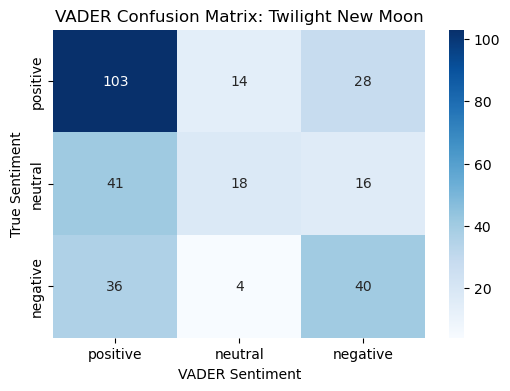

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate VADER's performance

#VADER Evaluation
valid_data = twilight_newmoon_labeled.dropna(subset=['vader_sentiment'])
accuracy = accuracy_score(twilight_newmoon_labeled['sentiment'], twilight_newmoon_labeled['vader_sentiment'])
print(f"VADER Accuracy: {accuracy:.4f}")
print("\nVADER Classification Report:")
print(classification_report(valid_data['sentiment'], valid_data['vader_sentiment']))

# VADER Confusion Matrix
cm_vader = confusion_matrix(twilight_newmoon_labeled['sentiment'], twilight_newmoon_labeled['vader_sentiment'], labels=['positive', 'neutral', 'negative'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_vader, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title('VADER Confusion Matrix: Twilight New Moon')
plt.xlabel('VADER Sentiment')
plt.ylabel('True Sentiment')
plt.savefig('twilight_newmoon_vader_confusion_matrix.png')    
plt.show()

